# Single output study
Notebook to accompany GitHub issue: [Enforce minimum of 2 outputs per transaction at the consensus level #5399](https://github.com/monero-project/monero/issues/5399) opened by Isthmus

Apr 2019 // Noncesense Research Lab // Data: [Neptune Research](https://github.com/NeptuneResearch/) // Analysis: [Isthmus](https://github.com/mitchellpkt)


# Issue

Typical transactions have at least 2 outputs: change + recipient(s). This is already implemented in the core software.

Thus, any transaction with a single output leaks two pieces of information:

-  The transaction is probably churn or a sweep
-  The user is employing non-standard software

As far as I know, enforcing >= 2 outputs per transaction at the consensus level will not impact any entities using correctly-designed software. This will be a forcing function to ensure that all wallets generate transactions that are indistinguishable (in this respect) from transactions constructed by the core software. 

## Import Libraries

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

## Import data

In [2]:
df = pandas.read_csv('tx_ringct_1_out.csv')
df.tail()

,height,mrt,mrt_friendly,tx_index,tx_hash
2517,1796250,1553252922,2019-03-22 11:08:42,1,889b9d6fc9cf87de8bcee4e890762cc49ed58445d014f8...
2518,1796299,1553259025,2019-03-22 12:50:25,1,b7a7608696d83d03f5ee656751dd43313ad54b1b22cd07...
2519,1796336,1553263716,2019-03-22 14:08:36,1,32dfeb0c293a65e1a0a1449a14f49c5d5e6c5fdf0e400f...
2520,1796357,1553265608,2019-03-22 14:40:08,1,288fc35627116250cd58f3884f6f6bc0f85411356327b8...
2521,1796382,1553269614,2019-03-22 15:46:54,1,db1f6d0347a3eaf2acc627c6f52ac694c6b12bd7dbad18...


Take a look at one of the transactions:

[db1f6d0347a3eaf2acc627c6f52ac694c6b12bd7dbad18](db1f6d0347a3eaf2acc627c6f52ac694c6b12bd7dbad18)

## How many single-output RingCT transactions occurred?

In [3]:
len(df)

2522

## When have single-output transactions occurred?

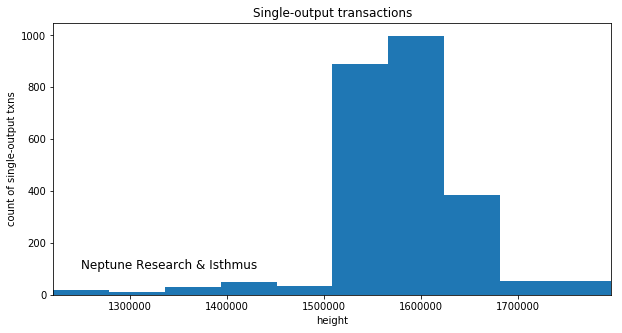

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist(df.height, bins = 10)
plt.title('Single-output transactions')
ax.set_xlabel('height')
ax.set_ylabel('count of single-output txns')
plt.xlim(np.min(df.height), np.max(df.height))
plt.text(1250000, 100, 'Neptune Research & Isthmus',size=12);

Above, we see that this is a continuous problem.

Below, let's take a look at the same plot with higher resolution:

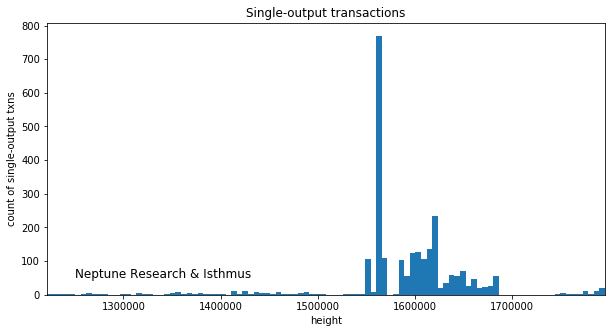

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist(df.height, bins = 100)
plt.title('Single-output transactions')
ax.set_xlabel('height')
ax.set_ylabel('count of single-output txns')
plt.axis('tight')
plt.xlim(np.min(df.height), np.max(df.height))
plt.text(1250000, 50, 'Neptune Research & Isthmus',size=12);

## Observations
From the above plots:
-  Single-output transactions (SOTXs) are a persistent intermittent phenomena
-  There was a surge of SOTXs around height 1562000
-  SOTXs are observed to this day

Additional research discovered that SOTXs often contain additional information leaks:
-  Unusually high fees (orders of magnitude above the block median)
-  Naturally, many SOTXs contain a large number of inputs, often using uniform decoy selection, revealing spends en masse
-  Unusual and high ring size (before it was fixed)